In [1]:
import curr_adventure as cad 
import jax.numpy as jnp
from jax import random as jrandom

# from curr_adventure.derivative_estimation.one_E_zero import FD_1E0, SD_1E0
# from utils import run_tests, mse_loss

from scipy.stats import linregress
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm 

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})

from jax.config import config
config.update("jax_enable_x64", True)

%load_ext autoreload

%autoreload 2

In [3]:
A = jnp.array([[4, 4], [4, 2]])
b = jnp.array([1, - 2])
b.T.dot(A.dot(b))

DeviceArray(-4, dtype=int64)

In [6]:
import curr_adventure as cad 
import jax.numpy as jnp
from jax import random as jrandom
from jax import jit, partial, grad, jacfwd


from curr_adventure.derivative_estimation.one_E_zero import SD_1E0
from curr_adventure.derivative_estimation.grid_generation import generate_ellipse


from utils import run_tests, mse_loss

from scipy.stats import linregress
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm 

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})

from jax.config import config
config.update("jax_enable_x64", True)

%load_ext autoreload

%autoreload 2

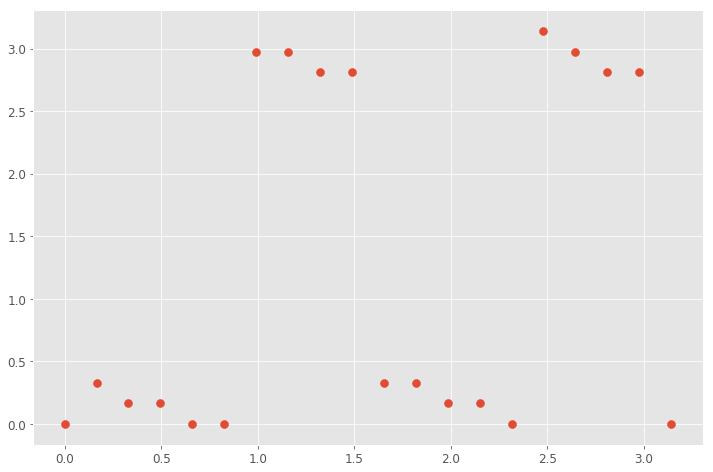

In [167]:
# jrandom_key, subkey = jrandom.split(jrandom_key)
v = jrandom.normal(jrandom_key, shape=(2,))
v = jnp.array([1/jnp.sqrt(2), 1/jnp.sqrt(2)])#v/jnp.linalg.norm(v)
w = jnp.array([- 1/jnp.sqrt(2), 1/jnp.sqrt(2)])
V = jnp.eye(2) # jnp.array([v, w])
S = jnp.array([0.2, 0.4])
A = jnp.sqrt(jnp.array([2, 1.2]))
S = 0.01 * 1./A # jrandom.normal(jrandom_key, shape=(2,))

def U(t):
    return jnp.array([[jnp.cos(t), jnp.sin(t)], [-jnp.sin(t), jnp.cos(t)]])

xs = jnp.linspace(0, jnp.pi, 20)

def err(v, S, A, U):
    n = jnp.sqrt(jnp.linalg.norm(jnp.diag(A).dot(U.dot(jnp.diag(S).dot(v)))))
    if n >= 1:
        print(n)
    return (n / (1 - n))**3

def t_err(V, S, A, U):
    DF = jnp.array([err(V.T[i], S, A, U) for i in range(V.shape[1])])
    return jnp.linalg.norm(jnp.linalg.inv(jnp.diag(S)).dot(V.dot(DF)))

xs2 = jnp.linspace(0, jnp.pi, 20)

ys = jnp.array([xs2[jnp.argmin(jnp.array([t_err(U(t1), S, A, U(t2)) for t2 in xs2]))] for t1 in xs])

plt.scatter(xs, ys)

In [170]:
U(0.245)


DeviceArray([[ 0.97013732,  0.24255632],
             [-0.24255632,  0.97013732]], dtype=float64)

0.0


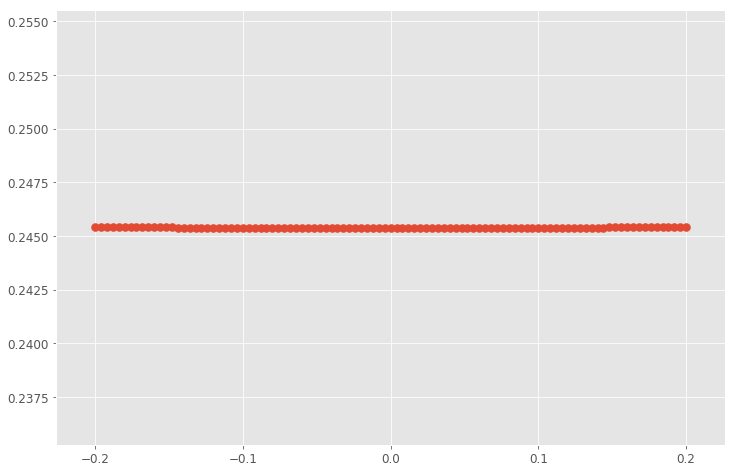

In [177]:
# jrandom_key, subkey = jrandom.split(jrandom_key)
v = jrandom.normal(jrandom_key, shape=(2,))
v = jnp.array([1/jnp.sqrt(2), 1/jnp.sqrt(2)])#v/jnp.linalg.norm(v)
w = jnp.array([- 1/jnp.sqrt(2), 1/jnp.sqrt(2)])
V = jnp.eye(2) # jnp.array([v, w])
S = jnp.array([0.2, 0.4])
A = jnp.sqrt(jnp.array([2, 1.2]))
S = 0.01 * 1./A # jrandom.normal(jrandom_key, shape=(2,))

def U(t):
    return jnp.array([[jnp.cos(t), jnp.sin(t)], [-jnp.sin(t), jnp.cos(t)]])

xs = jnp.linspace(-0.2, 0.2, 101)

def err(v, S, A, U):
    n = jnp.sqrt(jnp.linalg.norm(jnp.diag(A).dot(U.dot(jnp.diag(S).dot(v)))))
    if n >= 1:
        print(n)
    return (n / (1 - n))**3

def t_err(V, S, A, U):
    DF = jnp.array([err(V.T[i], S, A, U) for i in range(V.shape[1])])
#     print(V.dot(DF))
    return jnp.linalg.norm(jnp.linalg.inv(jnp.diag(S)).dot(V.dot(DF)))

ys = jnp.array([t_err(U(0), S, A, U(t2)) for t2 in xs])

print(xs[jnp.argmin(ys)])

plt.scatter(xs, ys)

In [117]:
S

DeviceArray([0.01123462, 0.0067838 ], dtype=float64)

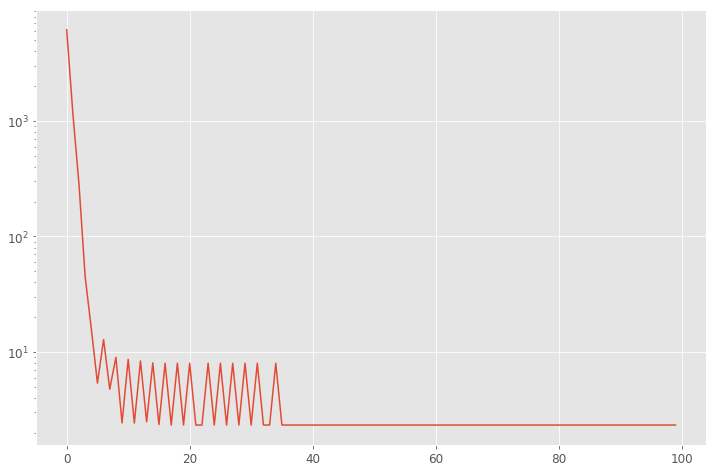

In [433]:
plt.plot(res)
plt.yscale("log")

In [294]:
import jax

class Ackley:
    def __init__(self, noise_std=0):
        self.noise_std = noise_std
    
    def f(self, X, jrandom_key=None):
        xs = X.T
        out_shape = xs[0].shape
        a = jnp.exp(-0.2 * jnp.sqrt(1. / len(xs) * jnp.square(jnp.linalg.norm(xs, axis=0))))
        b = - jnp.exp(1. / len(xs) *jnp.sum(jnp.cos(2 * jnp.pi * xs), axis=0))
        ret = jnp.array(-20 * a + b + 20 + jnp.exp(1)).reshape(out_shape)
        if jrandom_key is not None:
            return ret + self.noise_std * jrandom.normal(jrandom_key, shape=(X.shape[0],)) 
        return ret


    def f1(self, X, jrandom_key=None):
        """del H/del xi = -20 * -0.2 * (xi * 1/n) / sqrt(1/n sum_j xj^2) * a + 2 pi sin(2 pi xi)/n * b"""
        xs = X.T
        out_shape = xs.shape
        a = jnp.exp(-0.2 * jnp.sqrt(1. / len(xs) * jnp.square(jnp.linalg.norm(xs, axis=0))))
        b = -jnp.exp(1. / len(xs) * jnp.sum(jnp.cos(2 * jnp.pi * xs), axis=0))
        a_p = -0.2 * (xs * 1. / len(xs)) / jnp.sqrt(1. / len(xs) * jnp.square(jnp.linalg.norm(xs, axis=0)))
        b_p = -2 * jnp.pi * jnp.sin(2 * jnp.pi * xs) / len(xs)
        grad = jnp.nan_to_num(
            -20 * a_p * a + b_p * b).reshape(out_shape)  # only when norm(x) == 0 do we have nan and we know the grad is zero there
        grad = grad.T

        if jrandom_key is not None:
            return grad + self.noise_std * jrandom.normal(jrandom_key, X.shape) 
        return grad

    def f2(self, X):
        return jacfwd(lambda x: self.f1(x, None))(X).reshape(X.shape[0], X.shape[1], X.shape[1])
    
class Brown:
    def __init__(self, noise_std=0):
        self.noise_std = noise_std
    
    def f(self, X, jrandom_key):
        X2 = X**2
        ret = jnp.sum(X2[:, :-1]**(X2[:, 1:] + 1) + X2[:, 1:]**(X2[:, :-1] + 1), axis=1)
        if jrandom_key is not None:
            return ret + self.noise_std * jrandom.normal(jrandom_key, shape=(X.shape[0],)) 
        return ret
    
    def f1(self, X, jrandom_key=None):
        X2 = X**2 
        logX2 = jnp.log(X2)
        logX2 = jax.ops.index_update(logX2, X2 == 0, 0)
        grad = jnp.zeros(X.shape)
        middle_terms = (2*(X2[:, 2:] + 1))*X2[:, 1:-1]**(X2[:, 2:])*X[:, 1:-1] + 2 * X[:, 1:-1] * logX2[:, 2:] * X2[:, 2:]**(X2[:, 1:-1] + 1) \
                        + (2*(X2[:, :-2] + 1))*X2[:, 1:-1]**(X2[:, :-2])*X[:, 1:-1] + 2 * X[:, 1:-1] * logX2[:, :-2]  * X2[:, :-2]**(X2[:, 1:-1] + 1)
        zeroth_term = (2*(X2[:, 1] + 1))*X2[:, 0]**(X2[:, 1])*X[:, 0] + 2 * X[:, 0] * logX2[:, 1] * X2[:, 1]**(X2[:, 0] + 1) 
        last_term = (2*(X2[:, -2] + 1))*X2[:, -1]**(X2[:, -2])*X[:, -1] + 2 * X[:, -1] * logX2[:, -2]  * X2[:, -2]**(X2[:, -1] + 1)
        
        grad = jax.ops.index_update(grad, jax.ops.index[:, 1:-1], middle_terms)
        grad = jax.ops.index_update(grad, jax.ops.index[:, 0], zeroth_term)
        grad = jax.ops.index_update(grad, jax.ops.index[:, -1], last_term)

        
        if jrandom_key is not None:
            return grad + self.noise_std * jrandom.normal(jrandom_key, X.shape) 
        return grad
    
    def f2(self, X):
        return jacfwd(lambda x: self.f1(x, None))(X).reshape(X.shape[0], X.shape[1], X.shape[1])

In [180]:
barrier_multiplier = 5

def LogPolytopeGetter(dim, noise=0):
    jrandom_key = jrandom.PRNGKey(0)
    b = jnp.ones(dim*barrier_multiplier)
    jrandom_key, subkey = jrandom.split(jrandom_key)
    ws = jrandom.normal(subkey, shape=(dim*barrier_multiplier, dim,)).dot(jnp.diag(jnp.linspace(0.1, 5, dim)))
    ws /= jnp.linalg.norm(ws, axis=1).reshape(-1, 1)
    jrandom_key, subkey = jrandom.split(jrandom_key)
    A = jrandom.normal(subkey, shape=(dim, dim))
    U, _, _ = jnp.linalg.svd(A) # some rotation matrix
    S = jnp.diag(jnp.linspace(0.1, 10, dim)) # the axis scaling
#     U = jnp.array([[-0.63746552,  0.77047888],
#              [ 0.77047888,  0.63746552]])
#     S = jnp.array([[0.1, 0. ],
#              [0. , 5. ]])
    ws = ws.dot(S.dot(U.T))
    return cad.Barriers.LogPolytopeBarrier(ws, b, noise)



funcs = {
    "LogPolytope": lambda dim: LogPolytopeGetter(dim, 0.05),
#     "Ackley": lambda dim: Ackley(0.05),
#     "Brown": lambda dim: Brown(0.1)

}

def config_creator(F, x_0, h, num_samples, hessian_geometry, costum=None):
    config = {}
    config["N"] = num_samples
    config["h"] = h
    config["costum"] = costum
    if hessian_geometry:
        config["ellipse_M"] = jnp.linalg.inv(F.f2(x_0.reshape(1, -1))[0])
#         print(F.f2(x_0.reshape(1, -1)))
#         print(jnp.linalg.eig(config["ellipse_M"]))
    else:
        config["ellipse_M"] = jnp.eye(x_0.shape[0])


    config["sample_subspace_basis"] = None
    config["F"] = F
#     config["distribution_name"] = "beta"
    config["is_uniform_sphere_random"] = False
    return config
    

fd_estimator = lambda F, x_0, h, num_samples, subkey: SD_1E0(F, x_0, config_creator(F, x_0, h, num_samples, False,), subkey, sample_based=True)
sd_estimator = lambda F, x_0, h, num_samples, subkey: SD_1E0(F, x_0, config_creator(F, x_0, h, num_samples, True), subkey, sample_based=True)




seed = 0

standard_deviations = list(jnp.logspace(1, -2, 20)) # [100, 10, 1, 0.25, 0.1] 
dimensions = [20] # jnp.linspace(10, 200, 11, dtype=int) # [10] # [100] #



In [181]:
FD_logs = []
SD_logs = []
SSD_logs = []
x = 0.1
x_0_generator = lambda dim: x*jnp.ones(dim)/jnp.linalg.norm(jnp.ones(dim))

frac_samples = [2] # list(jnp.logspace(0.1, 1.5, 3))
num_runs = 5

FD_logs = run_tests(fd_estimator, funcs, x_0_generator, standard_deviations, dimensions, frac_samples, num_runs, seed, loss_type="MSE")
 
SD_logs = run_tests(sd_estimator, funcs, x_0_generator, standard_deviations, dimensions, frac_samples, num_runs, seed, loss_type="MSE")
    

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


In [57]:
from jax import grad as jgrad

jrandom_key = jrandom.PRNGKey(0)

def helper_linesearch(F, H, sigma_f, dim, c1=0.001, c2=0.7, ):

    def helper(x_0, search_direction):
        combined_F = F
        f0 = combined_F.f(x_0, H, sigma_f, dim)
        f1 = combined_F.f1(x_0, H, sigma_f, dim)
        dg = jnp.inner(search_direction, f1)

        def armijo_rule(alpha):
            return combined_F.f(x_0 + alpha * search_direction, H, sigma_f, dim) > f0 + c1*alpha*dg
        
        def armijo_update(alpha):
            return c2*alpha
            
        alpha = 1
        while armijo_rule(alpha):
            alpha = armijo_update(alpha)

        return alpha

    return helper



class selfConcordantBound():

    def __init__(self):
        pass
    
    def makeXvalid(self, X_vec):
        X = X_vec.reshape(dim, -1)
        

    
    def f(self, X_vec, H, sigma_f, dim):
        X = X_vec.reshape(dim, -1)
        
        xhx = jnp.sqrt(jnp.array([x.T.dot(H.dot(x)) for x in X.T]))
        DF3 = 1/6. * (2*xhx**2 / (1 - xhx)**2 )**(3/2.)
        XXT_inv = jnp.linalg.inv(X.dot(X.T))

        if any(xhx > 1):
            return float("inf")
    
        return jnp.linalg.norm(jnp.linalg.norm(XXT_inv.dot(X * DF3), axis=1))**2 + sigma_f**2*jnp.linalg.norm(XXT_inv.dot(X))**2 


#         return jnp.linalg.norm(XXT_inv.dot(X * DF3))**2 + sigma_f**2*jnp.linalg.norm(XXT_inv.dot(X))**2 

#         return jnp.linalg.norm(jnp.abs(XXT_inv).dot(jnp.abs(X).dot(DF3)))**2 + sigma_f**2*jnp.linalg.norm(XXT_inv.dot(X.dot(jnp.ones(X.shape[1]))))**2 

    def f1(self, X_vec, H, sigma_f, dim):
        return jgrad(lambda x: self.f(x, H, sigma_f, dim))(X_vec)
    


                             

In [176]:
F = funcs["LogPolytope"](dim)
x_0 = x_0_generator(dim) 
H = F.f2(x_0.reshape(1, -1))[0]
jnp.linalg.eig(H)[0]

DeviceArray([1.81550085e+03+0.j, 1.36353315e+03+0.j, 9.34945725e+02+0.j,
             7.23959347e+02+0.j, 6.91105893e+02+0.j, 4.58614981e+02+0.j,
             3.51672487e+02+0.j, 2.73395323e+02+0.j, 1.71258321e+02+0.j,
             1.38707582e+02+0.j, 8.43991165e+01+0.j, 5.94902838e+01+0.j,
             3.81680498e+01+0.j, 2.01592885e+01+0.j, 9.83450704e+00+0.j,
             3.78263193e+00+0.j, 1.46243541e+00+0.j, 3.48882318e-01+0.j,
             3.00580368e-02+0.j, 6.70245999e-05+0.j], dtype=complex128)

In [75]:
dim = 20

SCB = selfConcordantBound()
F = funcs["LogPolytope"](dim)
x_0 = x_0_generator(dim)
H = F.f2(x_0.reshape(1, -1))[0]

jrandom_key, subkey = jrandom.split(jrandom_key)
N = dim
X = 0.01 * jrandom.normal(subkey, shape=(dim * N, )) # generate_ellipse(dim, 4, jnp.linalg.inv(H), False, None)[:2].T.reshape(-1) #
print(X)

sigma_f = 0.1



# print(SCB.f(jnp.concatenate([X.reshape(dim, -1), -X.reshape(dim, -1)], axis=1).reshape(-1), H, sigma_f, dim))
# print(SCB.f(X, H, sigma_f, dim))
# print(SCB.f(0.1*H_half, H, sigma_f, dim))


linesearch = helper_linesearch(SCB, H, sigma_f, dim)
    
num_steps = 500
delta = 0.1
res = []
res_true = []
for _ in tqdm(range(num_steps)):
    jrandom_key, subkey = jrandom.split(jrandom_key)
    res.append(SCB.f(X, H, sigma_f, dim))
    res_true.append(approx_G(X.reshape(dim, -1), subkey))

    search_direction = -SCB.f1(X, H, sigma_f, dim)
    alpha = linesearch(X, search_direction) 
    X += alpha*search_direction

X = X.reshape(dim, -1)

  0%|          | 0/500 [00:00<?, ?it/s]

[ 1.26280509e-02  2.43918214e-03 -1.41711535e-02 -4.82897615e-03
  3.35510530e-04  5.64513602e-03  2.87000904e-02 -1.43118325e-02
  8.26535793e-03 -9.03077485e-04  8.93776105e-03  2.17020596e-03
  1.15246477e-02 -2.28901305e-03  4.01084203e-03 -9.95992774e-03
  3.15728746e-03  4.93106994e-03 -8.39612720e-03 -1.85543905e-02
 -1.13137750e-02  6.30182904e-03 -2.08974138e-03  6.72902478e-03
 -3.31669057e-03 -3.57752889e-03 -3.23632134e-03  2.82462384e-02
  4.46726749e-03 -5.91986649e-03 -1.44297082e-03 -6.70183301e-03
 -1.56236994e-03 -3.18915475e-04 -7.37431518e-03  1.90598992e-02
 -1.47673878e-02  3.67603968e-04  1.29464096e-03 -6.24385578e-05
 -3.44450503e-03 -1.24559335e-03 -1.01728461e-02 -2.17547345e-02
  3.68224240e-03  4.43016652e-04 -6.03336663e-03  1.57414041e-03
  2.39583115e-03 -7.01390054e-04  5.23248365e-03  1.11325157e-02
  6.71007129e-03  3.66648984e-03  1.57699692e-02  6.27714982e-03
 -1.05415212e-02  5.12751407e-03  7.90029783e-03  2.35349376e-03
 -4.05673169e-04 -1.54617

100%|██████████| 500/500 [07:03<00:00,  1.10it/s]


In [76]:
jrandom_key, subkey = jrandom.split(jrandom_key)


approx_G(X, subkey, 100)

DeviceArray(0.54483031, dtype=float64)

In [77]:
jrandom_key, subkey = jrandom.split(jrandom_key)


approx_G(0.9 * S.T, subkey, 100)

DeviceArray(0.06960792, dtype=float64)

In [78]:
S = generate_ellipse(dim, dim * 2, jnp.linalg.inv(H), False, None)
# print(S - jnp.mean(S, axis=0))
# print(S.T.dot(S))
# plt.scatter(S[:, 0], S[:, 1])

In [82]:
SCB.f(0.9*S.T, H, sigma_f, dim)

DeviceArray(1.14595334e+08, dtype=float64)

In [83]:
SCB.f(X, H, sigma_f, dim)

DeviceArray(106.86206925, dtype=float64)

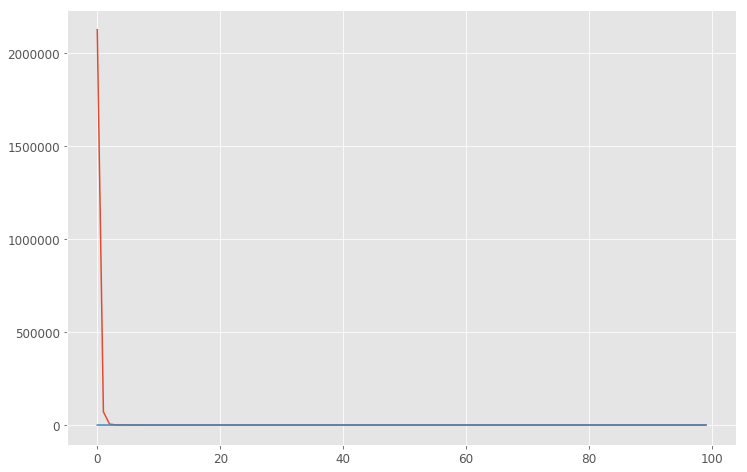

In [62]:
plt.plot(res)
plt.plot(res_true)
# plt.ylim(0, 100)

In [28]:
X

DeviceArray([[-0.05544181, -0.03304829],
             [ 0.04408455,  0.06263287]], dtype=float64)

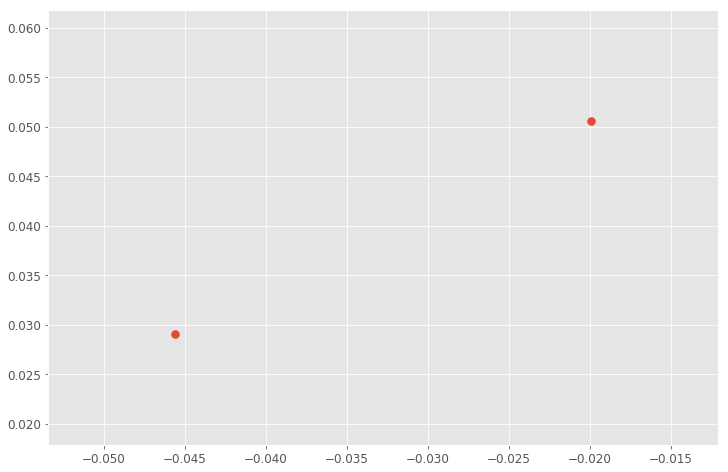

In [43]:
# X = 0.01 * jrandom.normal(subkey, shape=(dim * N, ))
# X = X.reshape(2, -1)
plt.scatter(X[0], X[1])

In [52]:
res = []

num_p = 100
# u = .0001
# l = -.0001
u = jnp.pi
l = 0

dim = 2
theta = 1
x_0 = jnp.zeros(dim).reshape(1, -1)
H = F.f2(x_0)[0]
G = F.f1(x_0)[0]

res_1 = []
for t in jnp.linspace(l, u, num_p):
    a = 0.0001
    direction = jnp.array([jnp.cos(t), jnp.sin(t)])

    xhx = jnp.sqrt((a*direction).T.dot(H).dot(a*direction))
    res_1.append(2/6. * xhx**3/(1 - xhx)**3)
    res.append(F.f(x_0 + a * direction) - F.f(x_0) - G.dot(a * direction) - 1/2. * (a*direction).T.dot(H).dot(a*direction))
    res_
    

In [54]:
jnp.pi/2.

1.5707963267948966

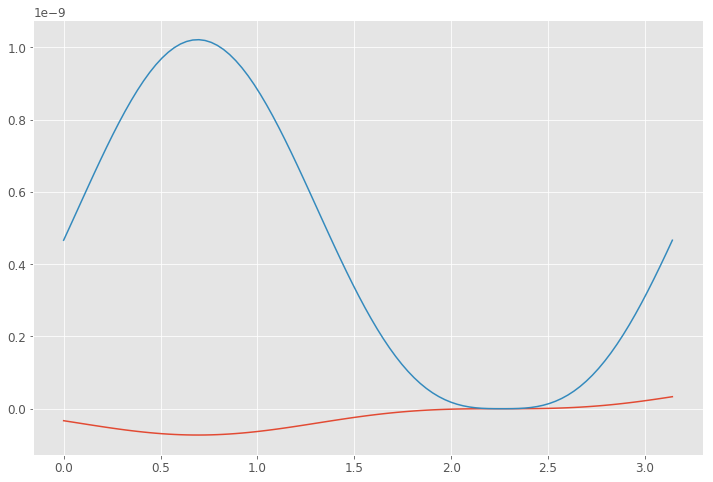

In [53]:
plt.plot(jnp.linspace(l, u, num_p), res)
plt.plot(jnp.linspace(l, u, num_p), res_1)

In [54]:
H = funcs["LogPolytope"](2).f2(x_0_generator(2).reshape(1, -1))[0]



In [50]:

    
def approx_G(X, jrandom_key, N = 5):
    dim = X.shape[0]
    x_0 = x_0_generator(dim)

    F = funcs["LogPolytope"](dim)
    res = []


    for _ in range(N):
                
        sample_points = jnp.concatenate([X, -X], axis=1).T + x_0
        ru = sample_points - jnp.mean(sample_points, axis=0)
        cov = jnp.cov(sample_points.T, bias=True).reshape(x_0.shape[0], x_0.shape[0])
        jrandom_key, subkey = jrandom.split(jrandom_key)
        out_vals = F.f(sample_points, subkey)
        f_ru = out_vals.T.dot(ru)/sample_points.shape[0]

        G = jnp.linalg.inv(cov).dot(f_ru)
        res.append(jnp.mean((F.f1(x_0.reshape(1, -1)) - G)**2))
#         print(G)
#         print(F.f1(x_0.reshape(1, -1)))
#     print(jnp.var(jnp.array(res)))
    return jnp.mean(jnp.array(res))
    


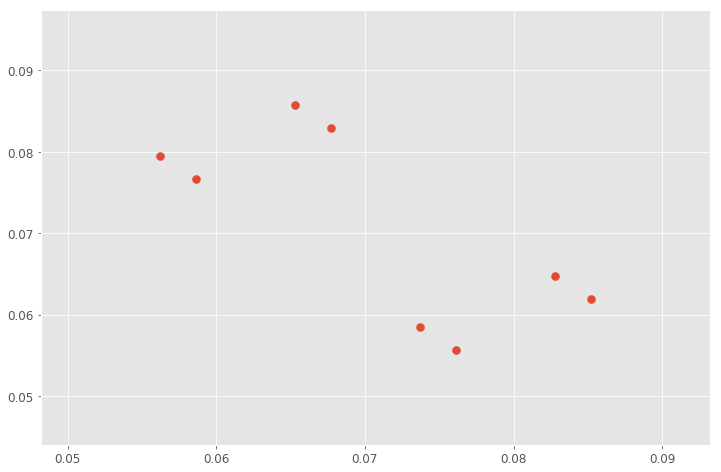

In [38]:
plt.scatter(sample_points[:, 0], sample_points[:, 1])

5.511876811714276
34.7162943538943


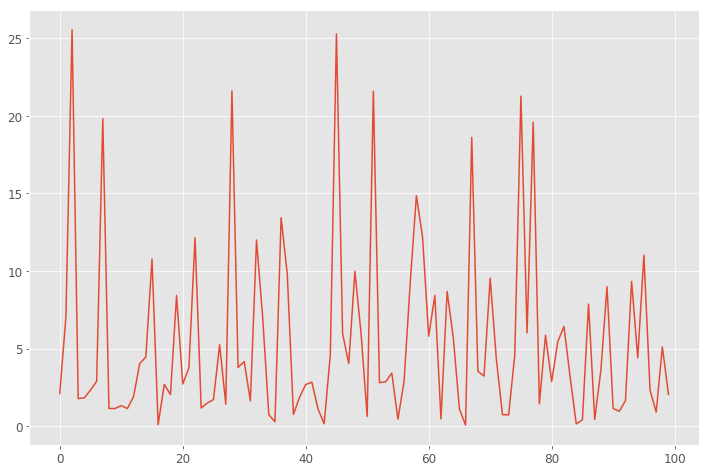

In [36]:
plt.plot(res)
print(jnp.mean(res))
print(jnp.var(res))

4.473807595072724
19.446043807745756


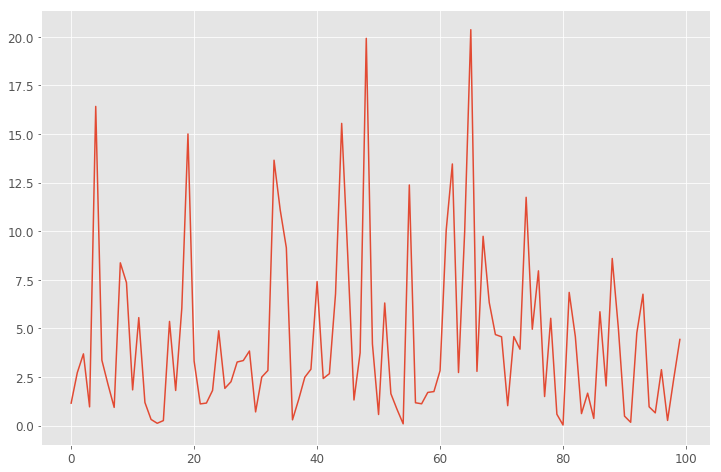

In [165]:
plt.plot(res)
print(jnp.mean(res))
print(jnp.var(res))

In [93]:
jnp.linalg.eig(H)

[DeviceArray([3.67956039e+02+0.j, 2.64520642e-02+0.j], dtype=complex128),
 DeviceArray([[ 0.77018552+0.j, -0.63781993+0.j],
              [ 0.63781993+0.j,  0.77018552+0.j]], dtype=complex128)]

In [504]:
jnp.min(F.dir_dists(x_0, S)[0])

DeviceArray(1.43462702, dtype=float64)

In [152]:
jnp.sqrt(D)

DeviceArray([19.18218024+0.j,  0.16264091+0.j], dtype=complex128)

In [146]:
D, U = jnp.linalg.eig(H)

L = U.dot(D)

In [209]:
S

DeviceArray([[-0.01721157, -0.01425355],
             [-1.68109116,  2.02996491],
             [ 0.01721156,  0.01425355],
             [ 1.68109116, -2.02996491]], dtype=float64)

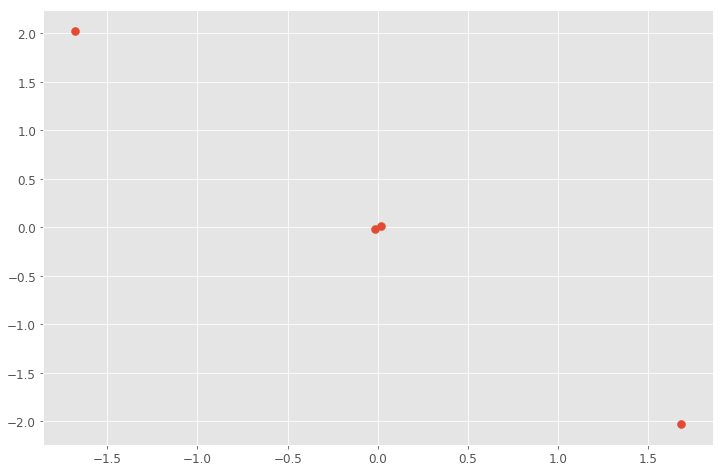

In [208]:
S = jnp.array([[ 0.05349911,  0.05645713],
             [-1.61038048,  2.10067559],
             [ 0.08792224,  0.08496423],
             [ 1.75180184, -1.95925423]])

S -= x_0

plt.scatter(S[:, 0], S[:, 1])

In [200]:
H.dot(S.T.dot(S))

DeviceArray([[2.00000000e+00, 9.09494702e-13],
             [0.00000000e+00, 2.00000000e+00]], dtype=float64)

[[ 30.76182652 -37.1392082 ]
 [-37.1392082   44.852075  ]]


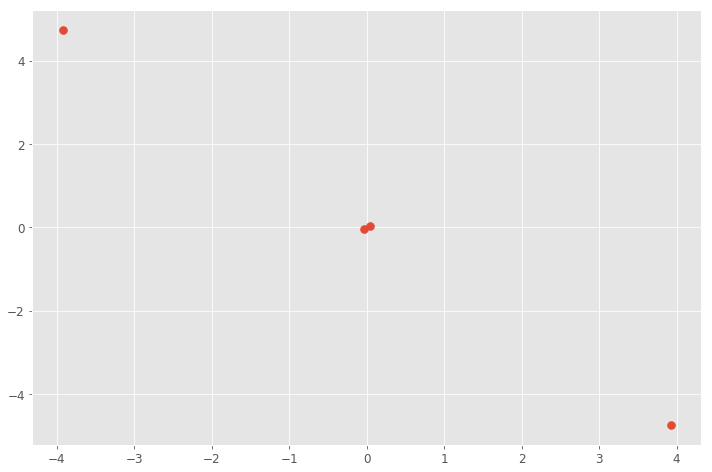

In [194]:
S = generate_ellipse(dim, 4, jnp.linalg.inv(H), False, None)
# print(S - jnp.mean(S, axis=0))
print(S.T.dot(S))
plt.scatter(S[:, 0], S[:, 1])

In [491]:
S

DeviceArray([[ 3.92185074, -4.73490842],
             [ 0.        ,  0.08172994],
             [-3.92185074,  4.73490842],
             [ 0.        , -0.08172994]], dtype=float64)

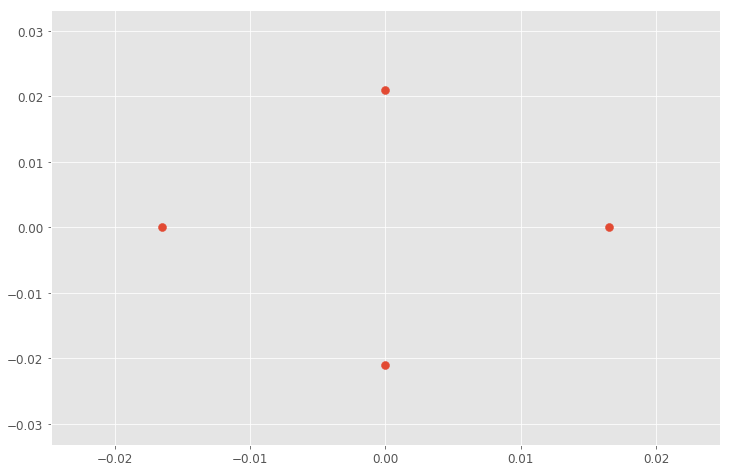

In [52]:
sample_points -= x_0
plt.scatter(sample_points[:, 0], sample_points[:, 1])

In [182]:
SD_means = SD_logs.mean_std()[0]
SD_std = SD_logs.mean_std()[1]
SD_means

loss_approx
function    dimension std       frac_samples             
LogPolytope 20        0.010000  2              459.296514
                      0.014384  2              197.180881
                      0.020691  2               77.525708
                      0.029764  2               52.992479
                      0.042813  2               24.577972
                      0.061585  2               18.669491
                      0.088587  2                6.975931
                      0.127427  2                2.492119
                      0.183298  2                1.495499
                      0.263665  2                0.566146
                      0.379269  2                0.623295
                      0.545559  2                2.102645
                      0.784760  2               12.058968
                      1.128838  2                     NaN
                      1.623777  2                     NaN
                      2.335721  2                     NaN
                      3.359818  2                     NaN
                      4.832930  2                     NaN
                      6.951928  2                     NaN
                      10.000000 2                     NaN

In [183]:
FD_means = FD_logs.mean_std()[0]
FD_std = FD_logs.mean_std()[1]
FD_means

loss_approx
function    dimension std       frac_samples             
LogPolytope 20        0.010000  2              858.529723
                      0.014384  2              299.908827
                      0.020691  2              177.395402
                      0.029764  2               81.950898
                      0.042813  2               41.775494
                      0.061585  2               23.620285
                      0.088587  2                9.994803
                      0.127427  2                5.144915
                      0.183298  2                2.907791
                      0.263665  2                1.200232
                      0.379269  2                0.796197
                      0.545559  2                1.074834
                      0.784760  2                5.283858
                      1.128838  2                     NaN
                      1.623777  2                     NaN
                      2.335721  2                     NaN
                      3.359818  2                     NaN
                      4.832930  2                     NaN
                      6.951928  2                     NaN
                      10.000000 2                     NaN

In [2]:
import numpy as np

In [24]:
N  = 10000
d= 1
m = 3

Gamma = np.random.normal(size=(m, m))
C = np.random.normal(size=(d, d))
G = np.random.normal(size=(d, m))

A = np.linalg.inv(np.linalg.inv(C) + G.dot(np.linalg.inv(Gamma).dot(G.T))).dot(G).dot(np.linalg.inv(Gamma))
B = C.dot(G).dot(np.linalg.inv(G.T.dot(C).dot(G) + Gamma))
np.linalg.norm(A - B)

2.8887141192996264e-15

In [21]:
def update(x, y, func, G, C, Gamma):
    return x + C.dot(G).dot(np.linalg.inv(G.T.dot(C).dot(G) + Gamma)).dot(y - func(x))



(10, 3)

In [390]:
import matplotlib.pyplot as plt
import numpy as np

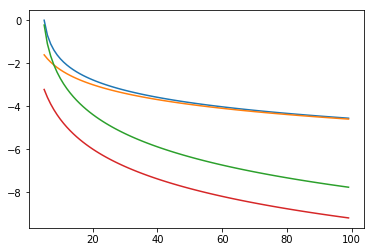

In [11]:
a = 4
plt.plot(range(a+1, 100), [np.log(1./(N - a)) for N in range(a + 1, 100)])
plt.plot(range(a+1, 100), [np.log(1./N) for N in range(a + 1, 100)])
plt.plot(range(a+1, 100), [np.log(1./(N - a) - 1./N) for N in range(a + 1, 100)])
plt.plot(range(a+1, 100), [np.log(1./N**2) for N in range(a + 1, 100)])

In [290]:

N = 10000

d = 2
Sigma_half = np.random.normal(size=(d, d))
Sigma = Sigma_half.dot(Sigma_half.T)

M = np.random.normal(size=(d, d, d))

errs_true = []
errs_approx = []
errs_middle_approx = []

num_trials = 10


def multi_linear_three(M, a, b, c):
    # M.shape = (d, d, d), a.shape=b.shape=c.shape=(d)
    
    Ma = np.tensordot(M, a, axes=((0), (0)))
    Mab = np.tensordot(Ma, b, axes=((0), (0)))
    return np.tensordot(Mab, c, axes=((0), (0)))

for N in range(10, 1000, 50):

    curr_true = 0.
    curr_approx = np.array([0., 0.])
    curr_middle = 0.
    
    for _ in range(num_trials):

        S = Sigma_half.dot(np.random.normal(size=(d, N)))
        multi_factor = [multi_linear_three(M, S[:, i], S[:, i], S[:, i]) for i in range(N)]


        second_term = 1./N * S.dot(multi_factor)
        first_term = np.linalg.inv(np.cov(S, bias=True)) - np.linalg.inv(Sigma)

        curr_true += np.linalg.norm(first_term.dot(second_term))
        curr_approx += [np.linalg.norm(first_term, ord=2)**2, np.linalg.norm(second_term)**2]
        curr_middle += np.linalg.norm(first_term, ord=2) * np.linalg.norm(second_term)
        
    errs_true.append(curr_true/num_trials)
    errs_approx.append((np.sqrt(curr_approx[0]) * np.sqrt(curr_approx[1]))/num_trials)
    errs_middle_approx.append(curr_middle/num_trials)

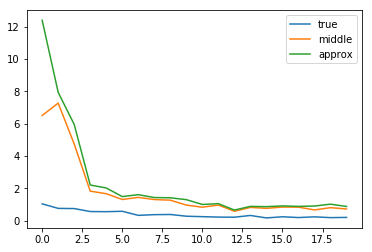

In [291]:
plt.plot(errs_true, label="true")
plt.plot(errs_middle_approx, label="middle")
plt.plot(errs_approx, label="approx")
plt.legend()

In [450]:

N = 1000

d = 2
Sigma_half_init = np.random.normal(size=(d, d))
Sigma = Sigma_half.dot(Sigma_half.T)

M = np.random.normal(size=(d, d, d))

errs_true = []
errs_approx = []
errs_middle_approx = []

num_trials = 100

eigeig = max(np.linalg.eig(np.linalg.inv(Sigma))[0])


def multi_linear_three(M, a, b, c):
    # M.shape = (d, d, d), a.shape=b.shape=c.shape=(d)
    
    Ma = np.tensordot(M, a, axes=((0), (0)))
    Mab = np.tensordot(Ma, b, axes=((0), (0)))
    return np.tensordot(Mab, c, axes=((0), (0)))

avg_sig = []

h = 0.1

for N in tqdm(np.linspace(20, 1000, 50)):

    curr_true = 0.
    curr_approx = np.array([0., 0.])
    curr_middle = np.array([0., None])
    
    Sigma_half = Sigma_half_init * h
    
    N = 10
    
    for _ in range(num_trials):

        S = Sigma_half.dot(np.random.normal(size=(d, N)))
        multi_factor = [multi_linear_three(M, S[:, i], S[:, i], S[:, i]) for i in range(N)]


        second_term = 1./N * S.dot(multi_factor)
        first_term = np.linalg.inv(np.cov(S, bias=True)) # - np.linalg.inv(Sigma)

        curr_true += np.linalg.norm(first_term.dot(second_term))
        curr_approx += [np.linalg.norm(first_term, ord=2)**2, np.linalg.norm(second_term)**2]
        curr_middle[0] +=  np.linalg.norm(first_term, ord=2)**2
        if curr_middle[1] is None:
            curr_middle[1] = np.linalg.norm(1./N * S * multi_factor, axis=1)**2
        else:
            curr_middle[1] += np.linalg.norm(1./N * S * multi_factor, axis=1)**2
        
    errs_true.append(curr_true/num_trials)
#     errs_approx.append((np.sqrt(curr_approx[0]) * np.sqrt(curr_approx[1]))/num_trials)
#     errs_middle_approx.append((np.sqrt(curr_middle[0]) * np.sum(np.sqrt(curr_middle[1])))/num_trials)
#     avg_sig.append(np.sqrt(curr_approx[0]/num_trials) * h**2 / (eigeig))

100%|██████████| 50/50 [00:03<00:00, 13.91it/s]


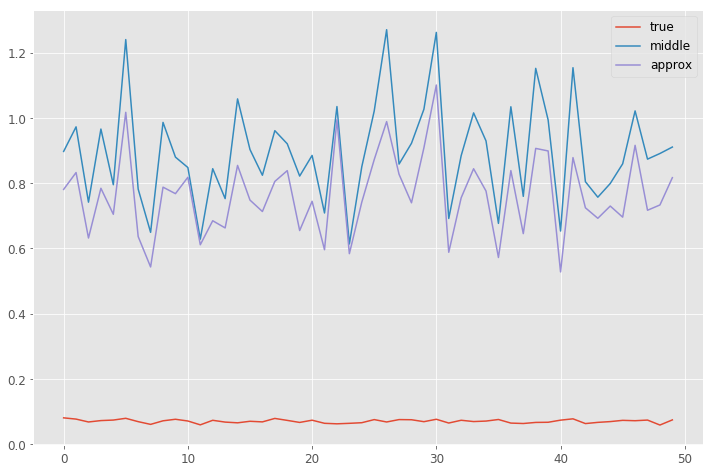

In [451]:
plt.plot(errs_true, label="true")
# plt.plot(errs_middle_approx, label="middle")
# plt.plot(errs_approx, label="approx")
# print(avg_sig)
# plt.plot(avg_sig)
# print(1/min(np.linalg.eig(Sigma)[0]))
plt.yscale('log')
plt.legend()

In [86]:
S = Sigma_half.dot(np.random.normal(size=(d, N)))

np.linalg.inv(S.dot(S.T)) - 1./N * np.linalg.inv(Sigma)

array([[ 0.00020821,  0.00062259,  0.00051812, -0.00091025],
       [ 0.00062259,  0.00211488,  0.00140857, -0.00186189],
       [ 0.00051812,  0.00140857,  0.00077385, -0.00146085],
       [-0.00091025, -0.00186189, -0.00146085, -0.00305349]])

In [372]:
f = Ackley(0)

dim = 50

Sigma_half = np.random.normal(size=(dim, dim))
Sigma_half = np.eye(dim) * 0.1

Sigma = Sigma_half.dot(Sigma_half.T)


num_tries = 1000

ssg_arr = []
douce_arr = []

x_0 = np.ones(dim) / np.linalg.norm(np.ones(dim)) * 0.3

for N in range(20, 500, 100):
    ssg_cur = np.zeros(dim)
    douce_cur = np.zeros(dim)


    for _ in range(num_tries):
        S = Sigma_half.dot(np.random.normal(size=(dim, N)))
        x_bar = np.mean(S, axis=1).reshape(-1, 1)
        fs = f.f(S.T + x_0)
        ssg_cur += np.linalg.inv(np.cov(S, bias=True)).dot((S - x_bar).dot(fs)) / N
        douce_cur += np.linalg.inv(Sigma).dot(S.dot(fs)) / N
        
    ssg_arr.append(ssg_cur / num_tries)
    douce_arr.append(douce_cur / num_tries)

(0.4, 0.7)

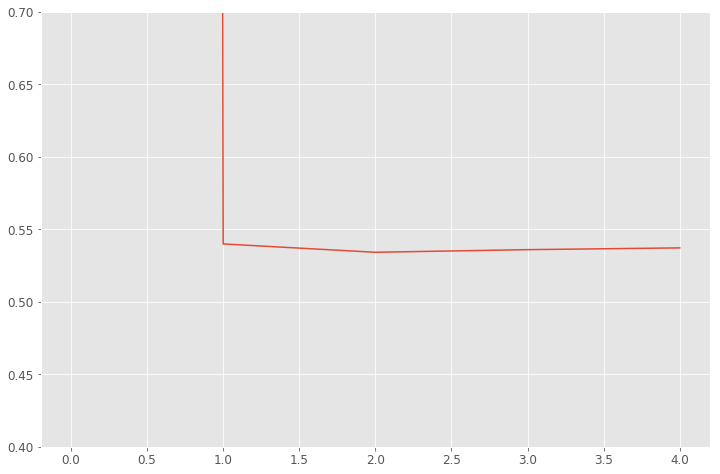

In [378]:
plt.plot(np.linalg.norm(np.array(ssg_arr) - f.f1(x_0), axis=1))
plt.ylim(0.4, 0.7)

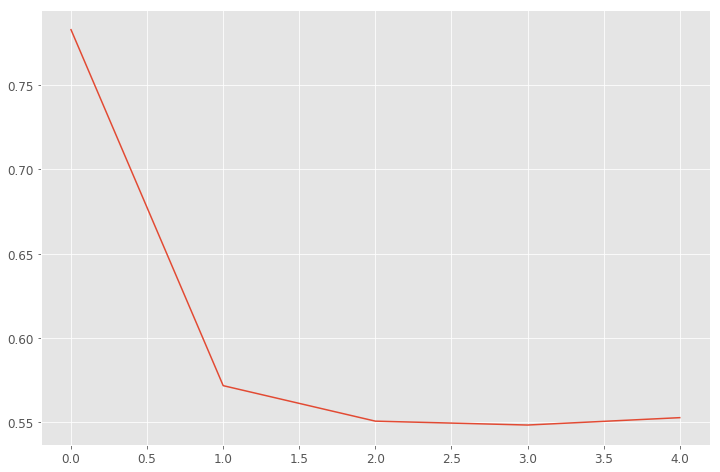

In [374]:
plt.plot(np.linalg.norm(np.array(douce_arr) - f.f1(x_0), axis=1))

In [2]:
import numpy as np

In [38]:
dim = 10
M = 100

Sigma_half = np.random.normal(size=(dim, dim))
Sigma_half = np.eye(dim) * 0.1

Sigma = Sigma_half.dot(Sigma_half.T)


W = np.random.normal(size=(dim, M))
b = np.ones(M) 

B = cad.Barriers.LogPolytopeBarrier(W.T, b)

x_1 = np.ones(dim) / np.linalg.norm(np.ones(dim))

num_samples = 10

hs = np.random.normal(size=(dim, num_samples))
hs /= np.linalg.norm(hs, axis=0)

In [42]:
numers = hs.T.dot(W) # num_samples x M. Every column are all the innerproducts of one w_i with all hs. 

true_res = []
upper_bound_res = []

for alpha in np.linspace(0, 0.35, 10):
    dists, signs = B._get_dists(alpha * x_1)
    
    if any(signs == 1):
        print(alpha)
        break
        
    denoms = 1./dists 
    
    true_res.append([np.abs(np.sum((numer * denoms)**3)) for numer in numers])
    upper_bound_res.append([np.sum((numer * denoms)**2)**(3./2) for numer in numers])
        
    
    
true_res = np.array(true_res)
upper_bound_res = np.array(upper_bound_res)
    

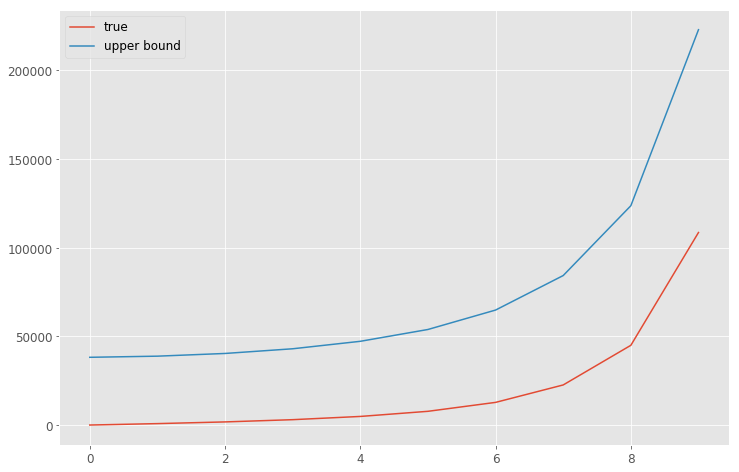

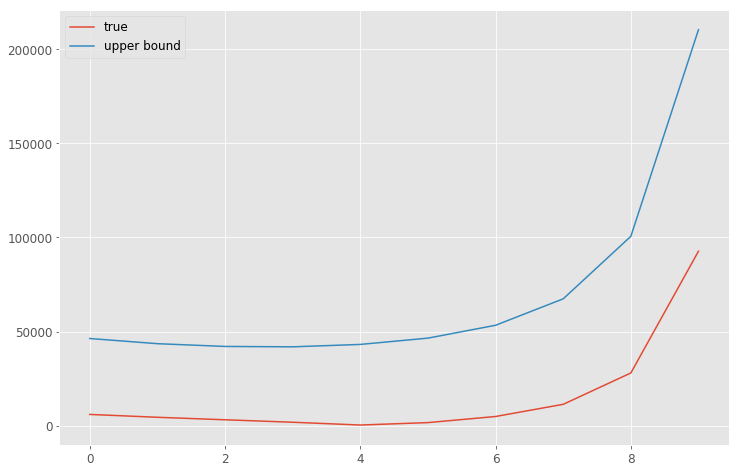

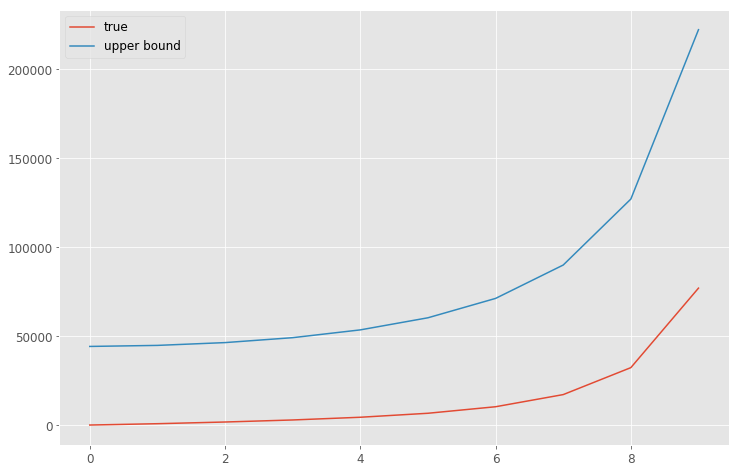

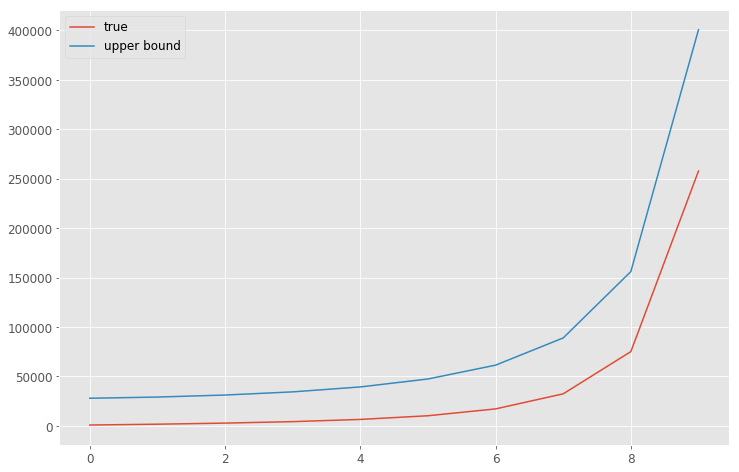

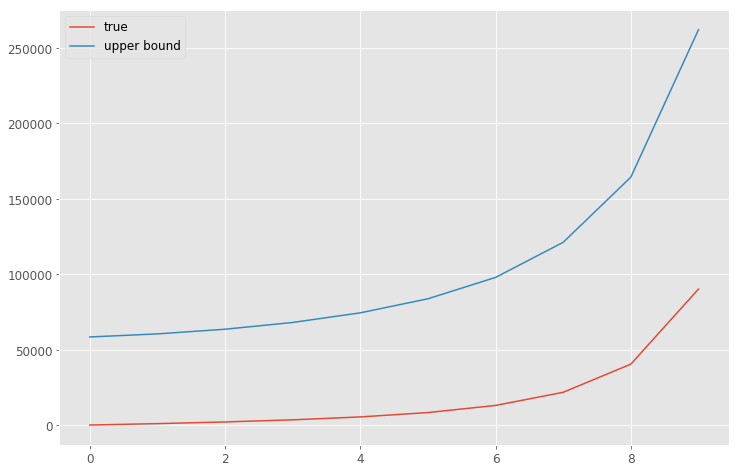

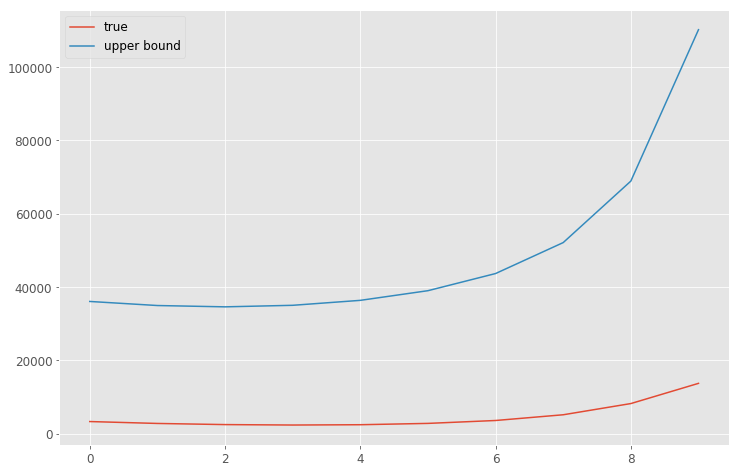

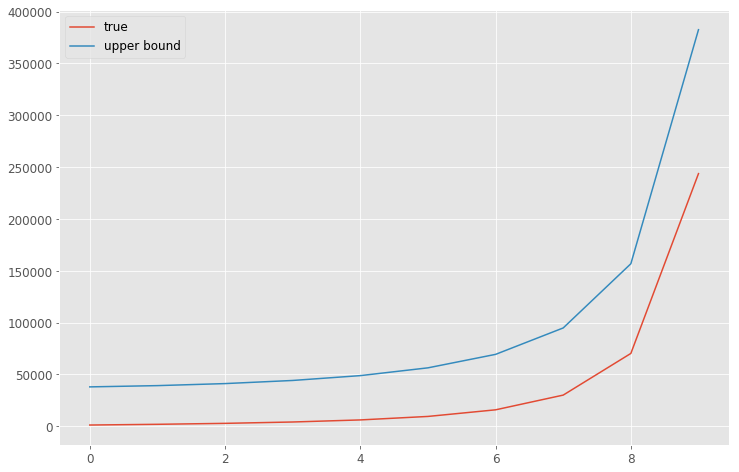

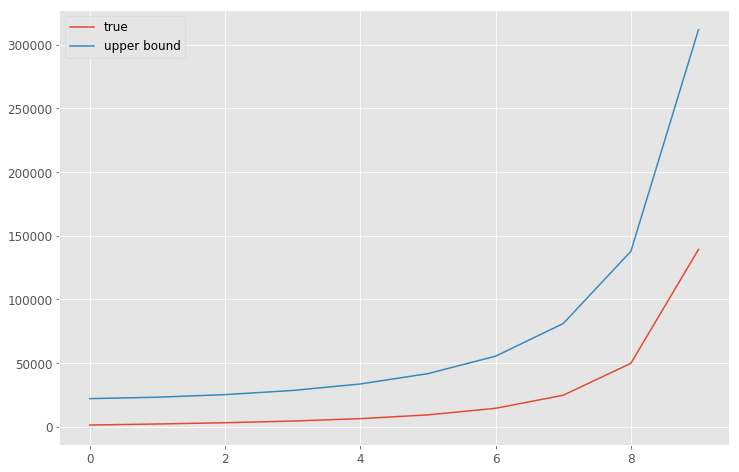

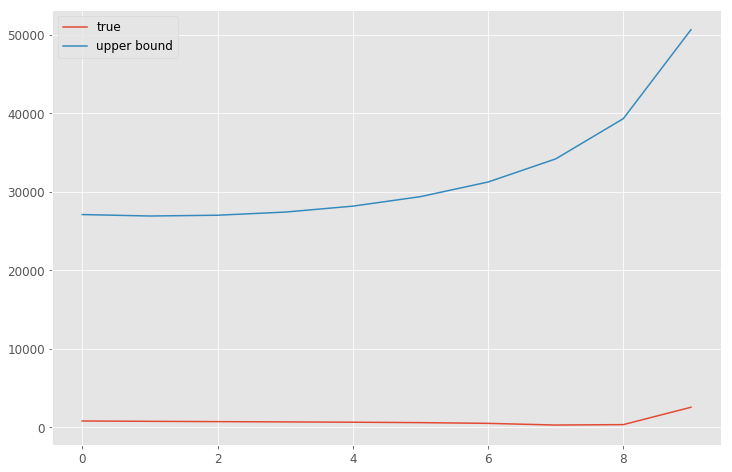

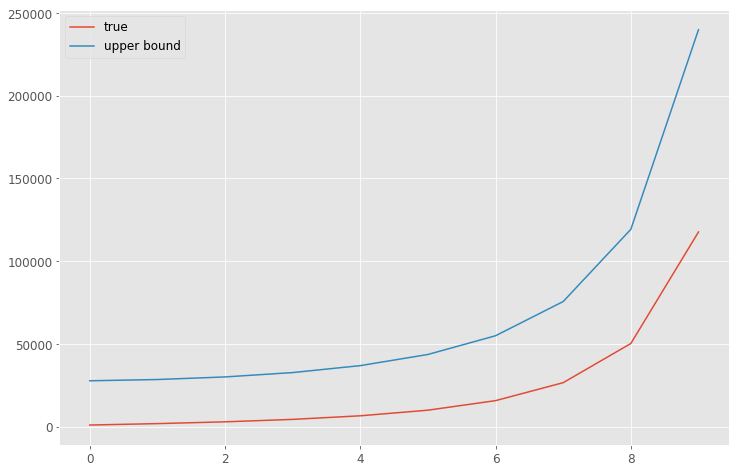

In [43]:
for i in range(num_samples):
    plt.plot(true_res[:, i], label="true")
    plt.plot(upper_bound_res[:, i], label="upper bound")
    plt.legend()
    plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
d = 2

num_trials = 100
res = []
C = np.random.normal(size=(d)) ** 2

D = np.diag(np.random.normal(size=(d)))

In [112]:
rr = []


for _ in range(1):
#     C = np.random.normal(size=(d)) ** 2
#     D = np.diag(np.random.normal(size=(d)))
#     C = 1/np.diag(D)**2

    num_tirals = 10000
    m = float('inf')
    U_m = None
    for _ in range(num_trials):
        A = np.random.normal(size=(d, d))
        S, U = np.linalg.eig(A.dot(A.T))
        r = np.array([(u.T.dot(D).dot(u))**2 for u in U])
#         res.append(r.dot(C))
        if r.dot(C) < m:
            m = r.dot(C)
            U_m = U
    print(C)
    rr.append(U_m)

[ 0.86308347 20.6023072 ]


In [113]:
rr

[array([[ 0.89284018, -0.45037364],
        [ 0.45037364,  0.89284018]])]

In [93]:
D

array([[-0.16155281,  0.        ],
       [ 0.        , -1.02564502]])

In [76]:
U_m

array([[ 0.72768859,  0.68590766],
       [-0.68590766,  0.72768859]])

In [79]:
U_m

array([[ 0.70816384, -0.70604814],
       [ 0.70604814,  0.70816384]])

In [81]:
U_m

array([[ 0.70816384, -0.70604814],
       [ 0.70604814,  0.70816384]])

In [68]:
U_m

array([1.6924256 , 0.27419198])

In [51]:
D

array([[-0.78501601,  0.        ],
       [ 0.        ,  0.14152781]])